In [1]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA :-
# Missing Data

let's checking missing data

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here about 15 percent of the age data is missing, so the proportion of age is small enough for replacement with some form of imputation. But while looking into Cabin column too much data is missing so we can drop it later. And only 2 data is missing in Embarked column maybe it is a outlier let's see it.
Let's continue to visualization part- (Univariate,Bivariate,Multivariate)

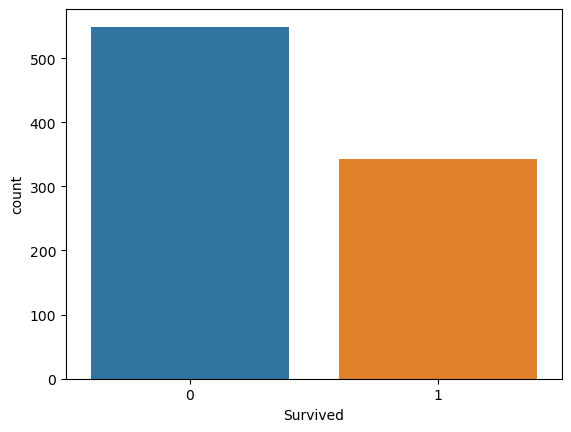

In [4]:
sns.countplot(x='Survived', data=df)
plt.show()

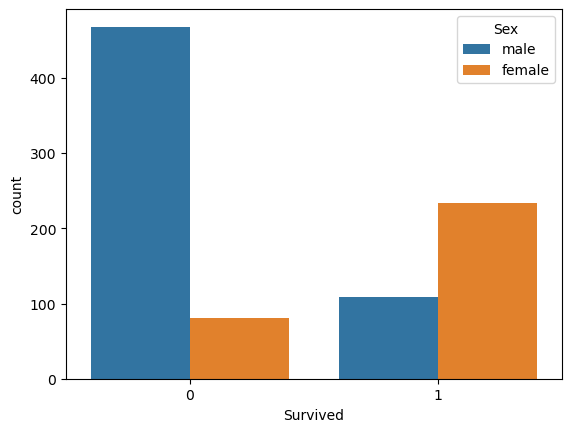

In [5]:
sns.countplot(x='Survived',hue='Sex', data=df)
plt.show()

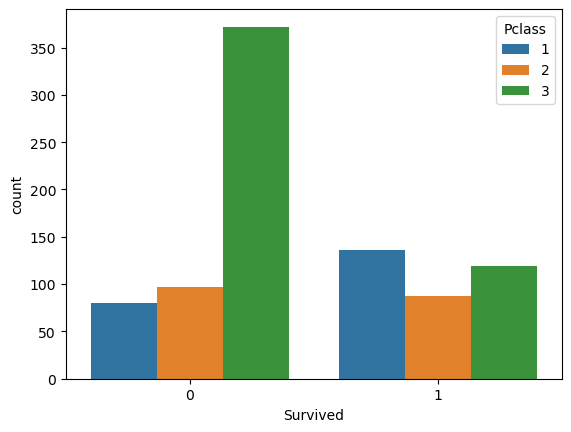

In [6]:
sns.countplot(x='Survived',hue='Pclass', data=df)
plt.show()

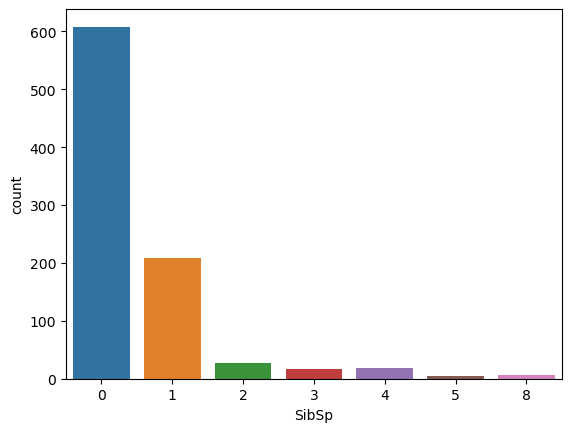

In [7]:
sns.countplot(x='SibSp', data=df)
plt.show()

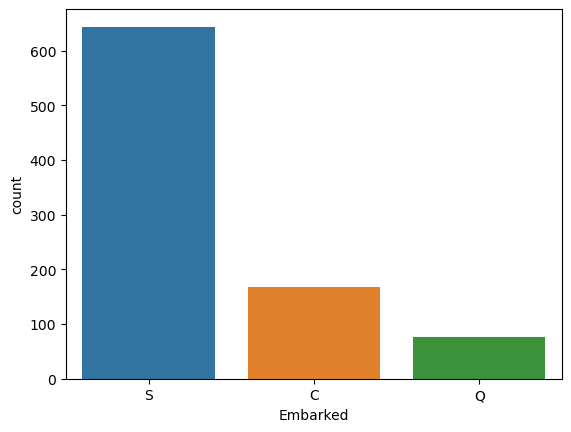

In [8]:
sns.countplot(x='Embarked', data=df)
plt.show()

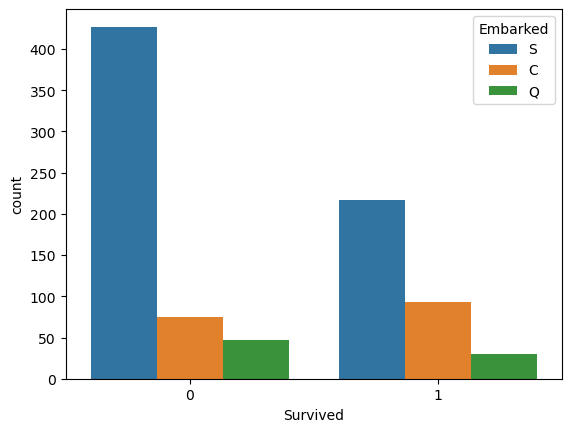

In [9]:
sns.countplot(x='Survived',hue='Embarked', data=df)
plt.show()

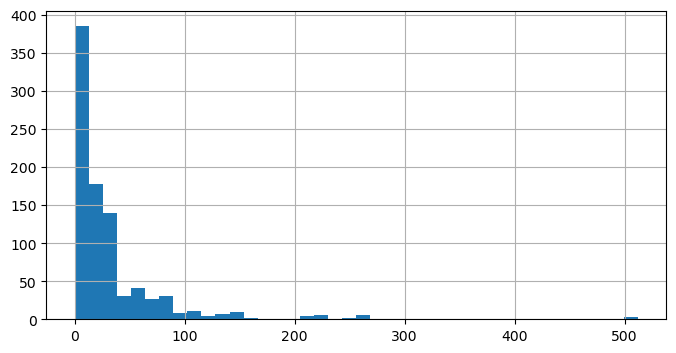

In [10]:
df['Fare'].hist(bins=40, figsize=(8,4))
plt.show()

In [11]:
# filling null value in age column and embarked column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# Embarked column have only 2 null value we can fill with which one have more number of values
df['Embarked'].fillna('S', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Changing the data types of following columns:= Embarked, sex,age

df['Age']=df['Age'].astype('int')
df['Sex']=df['Sex'].astype('category')
df['Embarked']=df['Embarked'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(2), float64(1), int32(1), int64(5), object(3)
memory usage: 68.2+ KB


In [17]:
df_new= df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,29,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [18]:
df_new.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
df_new = pd.get_dummies(df_new, columns = ['Sex'],drop_first=True)

In [20]:
df_new = pd.get_dummies(df_new, columns = ['Embarked'],drop_first=True)
df_new

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,1,0,1
887,1,1,19,0,0,30.0000,0,0,1
888,0,3,29,1,2,23.4500,0,0,1
889,1,1,26,0,0,30.0000,1,0,0


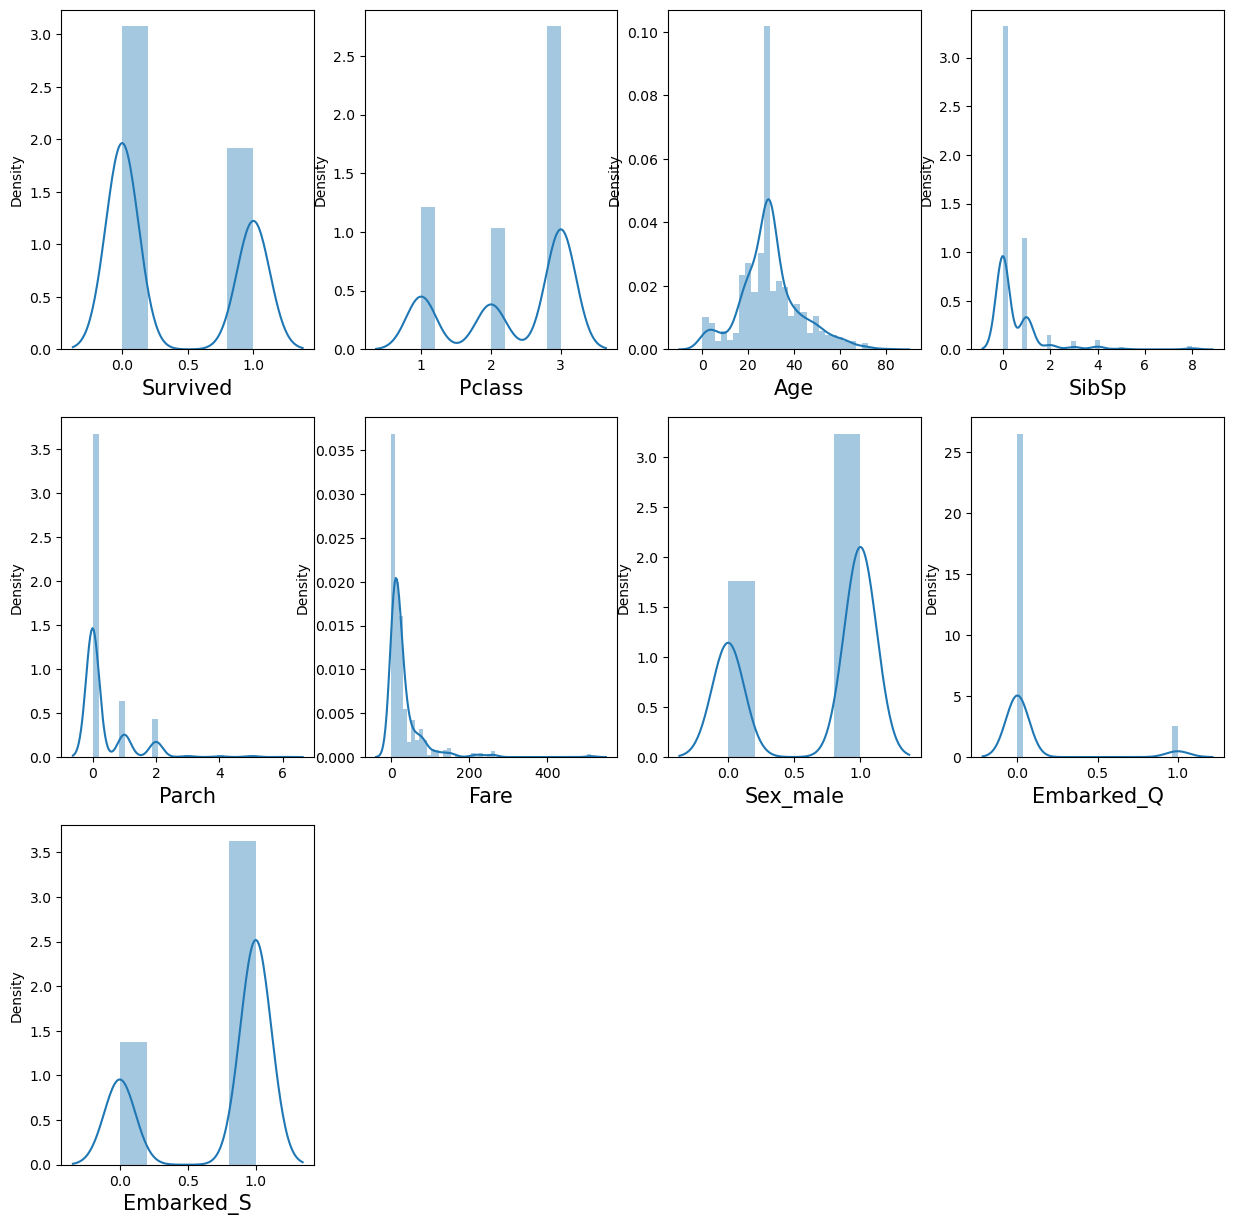

In [21]:
#chechking the data is normal distributed or not

plt.figure(figsize=(15,15))
plotnumber =1

for column in df_new:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

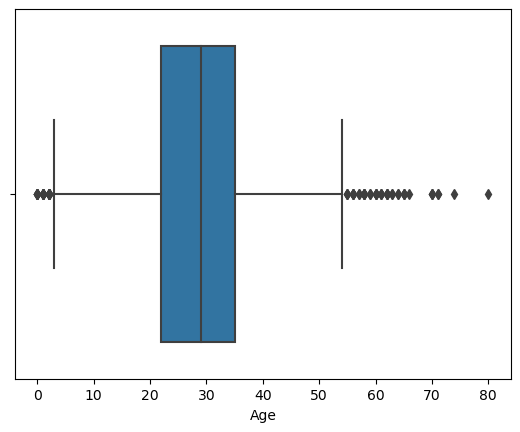

In [22]:
# above distribution shows age and fare have some skewed let's check using box plot

sns.boxplot(x='Age', data=df_new)
plt.show()


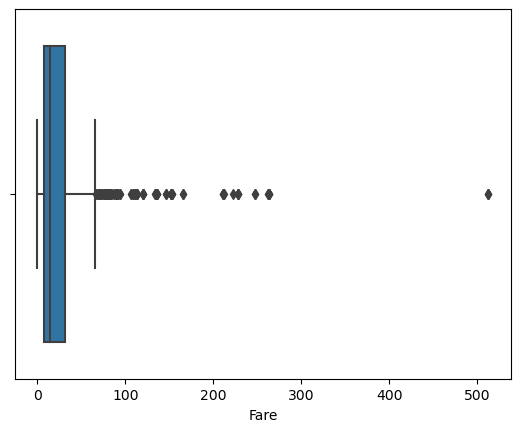

4.787316519674893

In [26]:
sns.boxplot(x='Fare', data=df_new)
plt.show()

df_new['Fare'].skew()

In [27]:
# Handling outliers from Fare column

Q1= np.percentile(df_new['Fare'],25)
Q3= np.percentile(df_new['Fare'],75)

outlier_down= Q1-1.5 *(Q3-Q1)
outlier_up= Q3+1.5 *(Q3-Q1)

df_new=df_new[(df_new['Fare']>outlier_down) & (df_new['Fare']<outlier_up)]

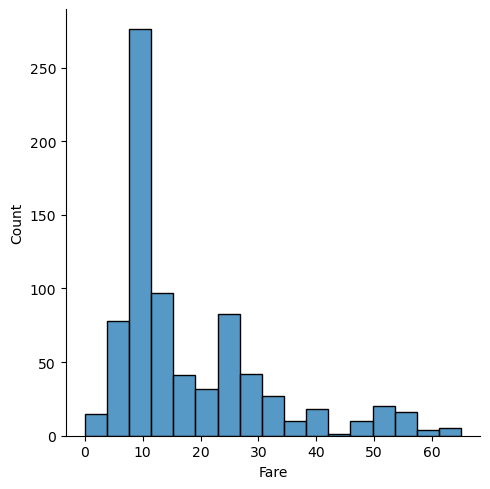

In [32]:
sns.displot(x='Fare', data=df_new)
plt.show()


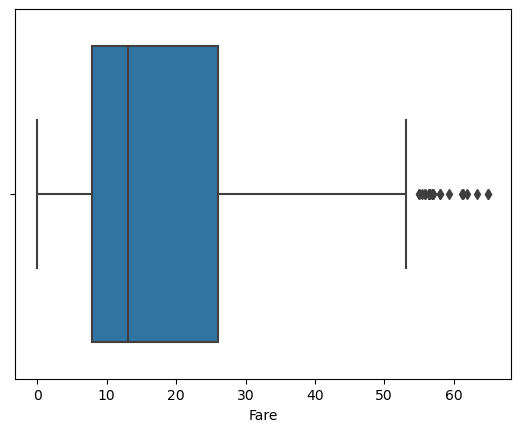

In [33]:
sns.boxplot(x='Fare', data=df_new)
plt.show()

still have some outliers in fare column but we are not dropping it because it affect our dataset

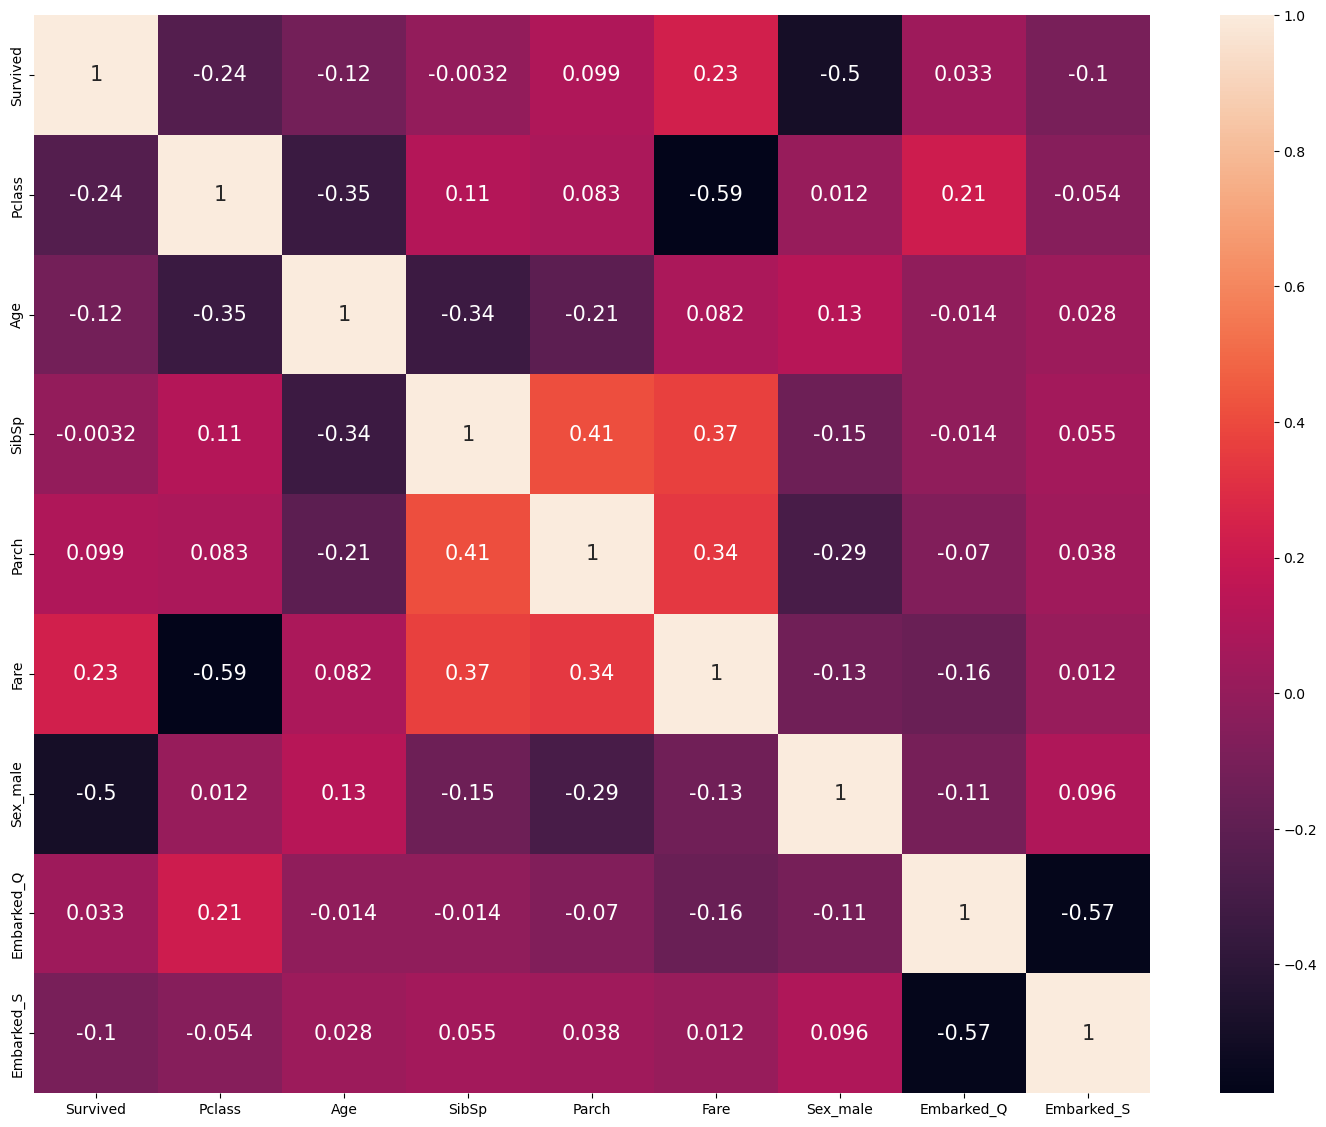

In [38]:
# plotting Heatmap correlation

df_cor= df_new.corr() # checking relationship

plt.figure(figsize=(18,14))
sns.heatmap(df_cor, annot=True, annot_kws={'size':15})
plt.show()

In [39]:
X = df_new.drop("Survived", axis=1)
y = df_new.Survived

In [40]:
# applying standard scaler

scalar= StandardScaler()
X_scaler= scalar.fit_transform(X)

In [41]:
# train test split

x_train,x_test,y_train,y_test= train_test_split(X_scaler, y, test_size=0.25, random_state=42)

In [42]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred= clf.predict(x_train)
        
        print("\n Train Result:")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred= clf.predict(x_test)
        
        print("\n Test Result:")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print('\n \n Test classification report \n',classification_report(y_test,pred, digits=2))
        

In [43]:
#model training
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:98.11%

 Test Result:
Accuracy Score:73.71%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       127
           1       0.61      0.66      0.63        67

    accuracy                           0.74       194
   macro avg       0.71      0.72      0.71       194
weighted avg       0.74      0.74      0.74       194



In [55]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf,x_test,y_test, cv=10, scoring='accuracy'))

[0.8        0.65       0.7        0.75       0.73684211 0.73684211
 0.78947368 0.73684211 0.84210526 0.94736842]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



lr= LogisticRegression()
rm= RandomForestClassifier()
knn= KNeighborsClassifier()
dt = DecisionTreeClassifier()

lr.fit(C)
rm.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print('All model are trained.')

lr.score(x_test,y_test)
dt.score(x_test,y_test)
rm.score(x_test,y_test)
knn.score(x_test,y_test)

print("Test Score are stored.")

All model are trained.
Test Score are stored.


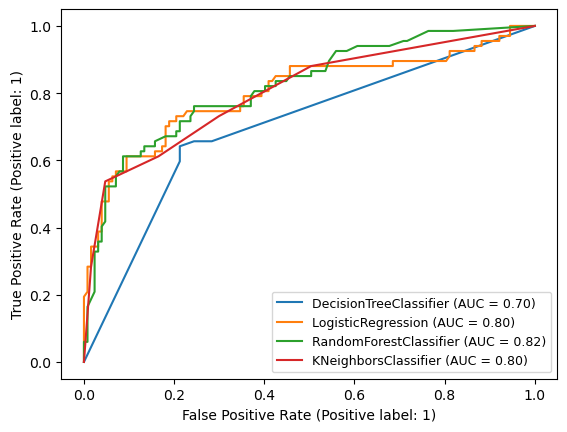

In [48]:
# ROC AUC curve on test data for all models

dis =plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rm,x_test,y_test, ax=dis.ax_)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)

plt.legend(prop={'size':9}, loc='lower right')

plt.show()


In [49]:
# trying to get more accuracy by applying hyperparameter tunning

para= {
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(4,10),
    
}

In [50]:
grid_search= GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=para, cv=6)

In [51]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(4, 10)})

In [52]:
best_para= grid_search.best_params_
best_para

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [53]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=3,min_samples_split=6)

# training model by applying best parameter
clf.fit(x_train,y_train)

metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:89.67%

 Test Result:
Accuracy Score:79.38%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       127
           1       0.73      0.64      0.68        67

    accuracy                           0.79       194
   macro avg       0.78      0.76      0.76       194
weighted avg       0.79      0.79      0.79       194



In [58]:
import pickle
pickle.dump(clf, open('titanic_project_model.pkl', 'wb'))

In [59]:
pickled_model = pickle.load(open('titanic_project_model.pkl', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)